# Imports

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load JSON files

In [14]:
# Load JSON files
with open("gpt_scores.json") as f1, open("deepseek_scores.json") as f2:
    data1 = json.load(f1)
    data2 = json.load(f2)

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)


# Average scores

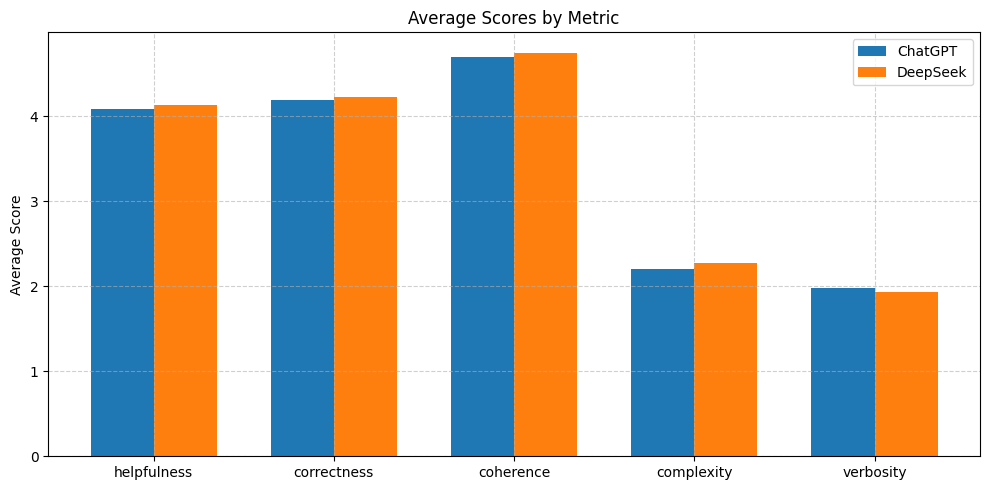

In [15]:
scores1 = pd.json_normalize(df1["scores"])
scores2 = pd.json_normalize(df2["scores"])

# Compute average scores
avg1 = scores1.mean()
avg2 = scores2.mean()

# Metrics to compare
metrics = ["helpfulness", "correctness", "coherence", "complexity", "verbosity"]

# === Plot 1: Bar chart comparing average scores ===
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, avg1[metrics], width, label='ChatGPT')
bars2 = ax.bar(x + width/2, avg2[metrics], width, label='DeepSeek')

ax.set_ylabel('Average Score')
ax.set_title('Average Scores by Metric')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

# Radar chart

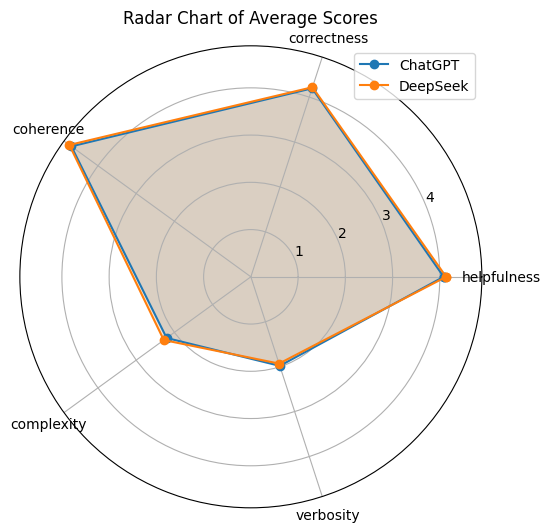

In [19]:
# === Plot 2: Radar chart ===
def create_radar_chart(avg1, avg2, metrics):
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    values1 = avg1[metrics].tolist()
    values2 = avg2[metrics].tolist()
    values1 += values1[:1]
    values2 += values2[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values1, label='ChatGPT', marker='o')
    ax.fill(angles, values1, alpha=0.2)

    ax.plot(angles, values2, label='DeepSeek', marker='o')
    ax.fill(angles, values2, alpha=0.2)

    ax.set_title("Radar Chart of Average Scores")
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper right')
    plt.show()

create_radar_chart(avg1, avg2, metrics)

# Bar chart on differences

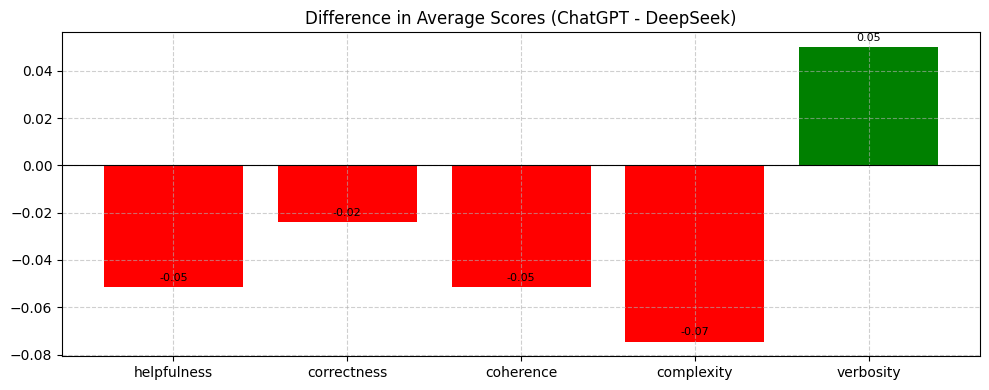

In [18]:
diff = avg1[metrics] - avg2[metrics]

fig, ax = plt.subplots(figsize=(10, 4))
bars = ax.bar(metrics, diff, color=['green' if d > 0 else 'red' for d in diff])
ax.set_title("Difference in Average Scores (ChatGPT - DeepSeek)")
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(True, linestyle="--", alpha=0.6)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()